Import all the stock data for analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# create a reading list
read_list=['XOM','BP','RDS-B','CVX','VLO','MPC','LYB','SLB','HAL',"TOT"]
filepath="C:\\Users\\mohua\\OneDrive\Documents\\capstone3\\dataset\\"
outfile='stocks and crude oil closing price'
outfile1='stocks and crude oil volume'
crude_oil='crude.csv'
time_period=60

df=pd.DataFrame()
reading_number=len(read_list)

In [3]:
df1=pd.read_csv(filepath+outfile+'.csv')

In [6]:
df=df1.set_index('time')
#print(df.head())
df.index=pd.to_datetime(df.index)
#print(df.index)

In [7]:
#df.head(10)

In [8]:
print("The stock time is from ",df.index.min(),' to ',df.index.max())

The stock time is from  2018-10-29 00:00:00  to  2020-10-15 00:00:00


In [9]:
def optimization_parameter(name,x,y):

    # There are 5 days. So frequency will be 5
    decomposition = seasonal_decompose(y, model='multiplicative', period=5)

    # Plot the original data, the trend, the seasonality, and the residuals 
    stock_value_trend = decomposition.trend.dropna()
    stock_value_seasonal = decomposition.seasonal
    stock_value_residual = decomposition.resid

    # Plot the original data, the trend, the seasonality, and the residuals
    plt.plot(y, label = name+' original')
    plt.legend(loc = 'best')
    
    plt.plot(stock_value_trend, label = name+' Trend')
    plt.legend(loc = 'best')
    
    plt.show()
    
    plt.plot(stock_value_seasonal, label = name+' seasonal')
    plt.legend(loc = 'best')
    plt.show()
    
    plt.plot(stock_value_residual, label =name+' Residuals')
    plt.legend(loc = 'best')
    plt.show()
    

    # Import augmented dicky-fuller test function
    # Run test
    result = adfuller(stock_value_trend)

    # Print test statistic
    print(result[0])

    # Print p-value
    p=result[1]
    print(p)

    # Print critical values
    print(result[4]) 

    y1=stock_value_trend
    y1_stationary=y1.diff().dropna()

    # Run test
    result = adfuller(y1_stationary)

    # Print test statistic
    print(result[0])

    # Print p-value
    p=result[1]
    print(p)

    # Print critical values
    print(result[4]) 

    plt.plot(y1_stationary)
    plt.show()
    
    

    order_aic_bic=[]

    # Loop over p values from 0-10
    for p in range(3):
      # Loop over q values from 0-10
        for q in range(3):
            #loop over d values from 0-10
            for d in range(3):
                # create and fit ARMA(p,q) model
                model = SARIMAX(y1_stationary, order=(p,d,q))
                results = model.fit()
        
                # Append order and results tuple
                order_aic_bic.append((p,d,q,results.aic,results.bic))# Construct DataFrame from order_aic_bic

    order_df = pd.DataFrame(order_aic_bic, columns=['p','d','q','AIC','BIC'])

    # Print order_df in order of increasing AIC
    AIC_sorted=order_df.sort_values('AIC')
    BIC_sorted=order_df.sort_values('BIC')

    print('The sorted results from AIC')
    print(AIC_sorted)

    # Print order_df in order of increasing BIC
    print('The sorted results from BIC')
    print(BIC_sorted)
 
    AIC_best=AIC_sorted.iloc[0]
    AIC1=AIC_best.to_numpy()
    print(AIC1)
    
    
    return AIC1[0],AIC1[1],AIC1[2],y1_stationary,y1,stock_value_trend

Now processing data is TOT close price . please wait......


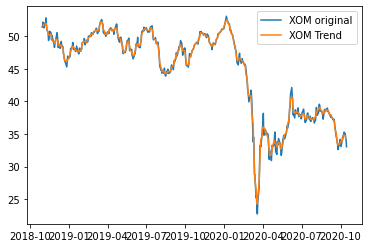

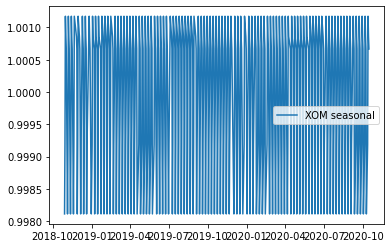

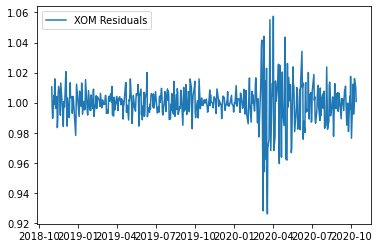

-1.161715510742502
0.6898442226160258
{'1%': -3.4444002781824477, '5%': -2.867735576537528, '10%': -2.57007000456571}
-4.626165164162894
0.00011556102233002692
{'1%': -3.4444002781824477, '5%': -2.867735576537528, '10%': -2.57007000456571}


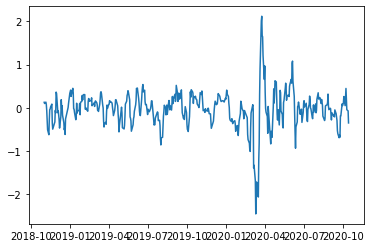

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

The sorted results from AIC
    p  d  q         AIC         BIC
21  2  0  1 -181.005118 -164.268523
24  2  0  2 -179.291325 -158.370581
18  2  0  0 -165.234407 -152.681961
15  1  0  2 -158.185566 -141.448970
12  1  0  1 -157.391760 -144.839313
9   1  0  0 -127.847427 -119.479130
10  1  1  0 -115.679505 -107.315335
4   0  1  1 -115.238842 -106.874672
13  1  1  1 -113.792155 -101.245900
19  2  1  0 -113.720289 -101.174034
7   0  1  2 -113.339312 -100.793057
16  1  1  2 -111.938547  -95.210207
22  2  1  1 -111.831225  -95.102885
25  2  1  2 -110.426439  -89.516015
14  1  2  1 -106.703909  -94.163859
8   0  2  2 -106.180279  -93.640229
26  2  2  2 -105.498826  -84.598743
23  2  2  1 -104.765008  -88.044942
1   0  1  0  -98.301669  -94.119584
17  1  2  2  -89.768097  -73.048030
5   0  2  1  -88.923277  -80.563244
6   0  0  2  -56.113433  -43.560987
20  2  2  0  -12.541545   -0.001495
11  1  2  0   45.363385   53.723418
2   0  2  0  130.113787  134.293804
3   0  0  1  164.524551  172.892849


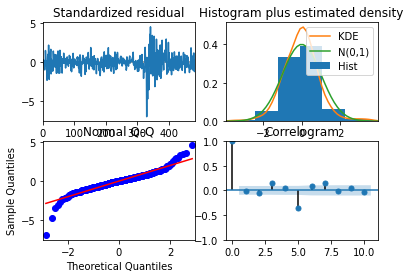

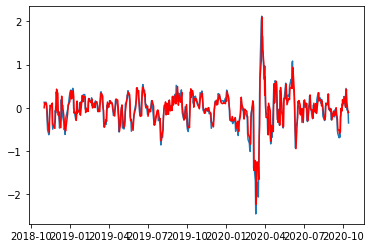

[-3.80216662e-01 -3.62633077e-01 -3.13406520e-01 -2.46543606e-01
 -1.73836833e-01 -1.04304250e-01 -4.40695127e-02  3.43121474e-03
  3.70297114e-02  5.72965958e-02  6.59874236e-02  6.55270604e-02
  5.85735351e-02  4.76827853e-02  3.50793956e-02  2.25262591e-02
  1.12781093e-02  2.09968562e-03 -4.67174890e-03 -9.03851378e-03
 -1.12453696e-02 -1.16855878e-02 -1.08188119e-02 -9.10564828e-03
 -6.96082612e-03 -4.72436178e-03 -2.64850533e-03 -8.97285091e-04
  4.44899129e-04  1.35908478e-03  1.87498971e-03  2.05411581e-03
  1.97446116e-03  1.71792715e-03  1.36092470e-03  9.68216227e-04
  5.89692531e-04  2.59572993e-04 -2.58172045e-06 -1.89663980e-04
 -3.04184010e-04 -3.55271456e-04 -3.55863414e-04 -3.20310006e-04
 -2.62520400e-04 -1.94682480e-04 -1.26521902e-04 -6.50215196e-05
 -1.44981575e-05  2.30729918e-05  4.75898187e-05  6.02990953e-05
  6.32854990e-05  5.90217453e-05  5.00078710e-05  3.85106928e-05
  2.64011957e-05  1.50783420e-05  5.46234360e-06 -1.96174623e-06]
Now processing data is H

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


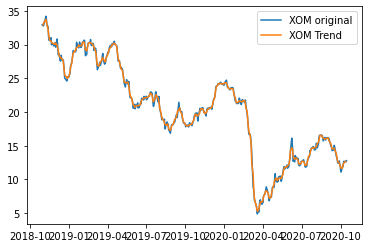

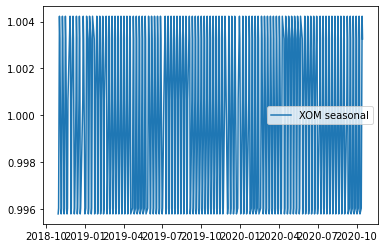

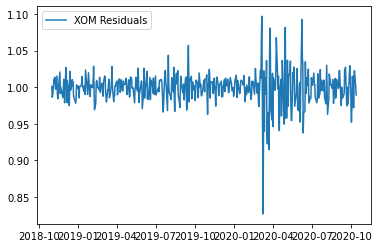

-1.5645025961325936
0.5013962969485242
{'1%': -3.4444305322234365, '5%': -2.8677488864580885, '10%': -2.5700770984781443}
-4.798644333219516
5.471162748108963e-05
{'1%': -3.4444305322234365, '5%': -2.8677488864580885, '10%': -2.5700770984781443}


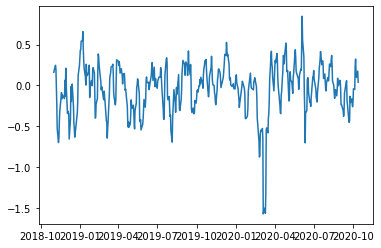

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

The sorted results from AIC
    p  d  q         AIC         BIC
21  2  0  1 -547.520030 -530.783434
18  2  0  0 -547.176049 -534.623602
24  2  0  2 -545.573841 -524.653097
15  1  0  2 -541.197845 -524.461250
12  1  0  1 -539.865563 -527.313117
4   0  1  1 -499.403015 -491.038846
9   1  0  0 -498.078482 -489.710184
10  1  1  0 -498.042185 -489.678015
7   0  1  2 -497.461672 -484.915418
13  1  1  1 -497.459852 -484.913597
19  2  1  0 -497.341743 -484.795488
22  2  1  1 -495.461374 -478.733035
16  1  1  2 -495.455074 -478.726734
25  2  1  2 -493.462038 -472.551613
26  2  2  2 -489.852305 -468.952222
8   0  2  2 -489.631645 -477.091595
14  1  2  1 -488.378218 -475.838168
17  1  2  2 -487.711196 -470.991129
23  2  2  1 -487.576665 -470.856598
1   0  1  0 -471.119514 -466.937430
5   0  2  1 -460.962322 -452.602289
6   0  0  2 -455.140024 -442.587577
20  2  2  0 -370.435088 -357.895038
11  1  2  0 -327.796752 -319.436719
2   0  2  0 -268.032942 -263.852925
3   0  0  1 -176.758297 -168.390000


C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


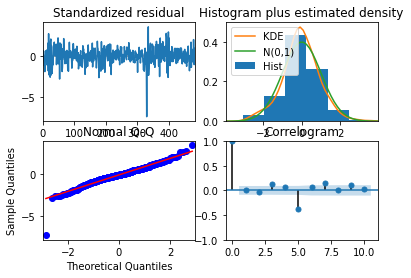

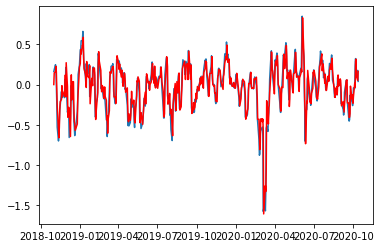

[-5.06936601e-03 -2.63462436e-02 -3.34596660e-02 -3.26678579e-02
 -2.80761793e-02 -2.21995034e-02 -1.64443089e-02 -1.14891534e-02
 -7.56606462e-03 -4.65684477e-03 -2.62213516e-03 -1.28069779e-03
 -4.53930840e-04  1.24993938e-05  2.41102551e-04  3.22927301e-04
  3.21786222e-04  2.79843407e-04  2.23156132e-04  1.66481225e-04
  1.17100447e-04  7.76697964e-05  4.82206395e-05  2.74849024e-05
  1.37162273e-05  5.15676578e-06  2.69046075e-07 -2.17792598e-06
 -3.10558208e-06 -3.16407666e-06 -2.78606736e-06 -2.24122751e-06
 -1.68410994e-06 -1.19257432e-06 -7.96615505e-07 -4.98747161e-07
 -2.87596120e-07 -1.46397777e-07 -5.78823612e-08 -6.75154855e-09
  1.93526922e-08  2.97480251e-08  3.10533240e-08  2.77043086e-08
  2.24887795e-08  1.70227005e-08  1.21358629e-08  8.16333030e-09
  5.15290256e-09  3.00445114e-09  1.55771220e-09  6.43350523e-10
  1.09329044e-10 -1.68300679e-10 -2.83684747e-10 -3.04153484e-10
 -2.75143829e-10 -2.25444158e-10 -1.71923814e-10 -1.23400116e-10]
Now processing data is S

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


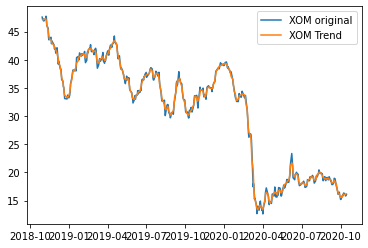

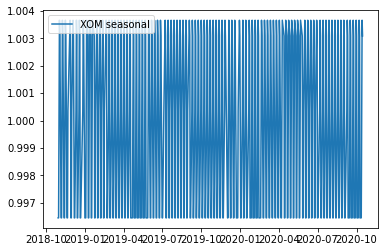

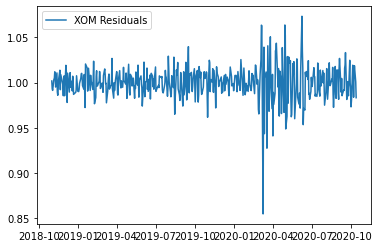

-0.9796598389387431
0.7606104333513403
{'1%': -3.4444305322234365, '5%': -2.8677488864580885, '10%': -2.5700770984781443}
-5.223995971862984
7.852638145405076e-06
{'1%': -3.4444609168389615, '5%': -2.8677622536920317, '10%': -2.5700842229549266}


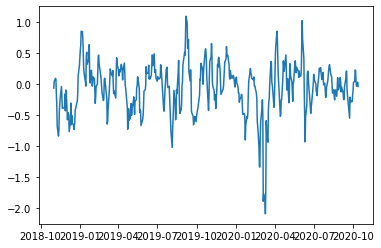

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

The sorted results from AIC
    p  d  q         AIC         BIC
24  2  0  2 -252.413371 -231.492627
12  1  0  1 -245.449998 -232.897551
18  2  0  0 -243.883259 -231.330812
21  2  0  1 -243.833641 -227.097045
15  1  0  2 -243.735469 -226.998873
16  1  1  2 -240.831808 -224.103468
25  2  1  2 -239.223048 -218.312624
7   0  1  2 -200.219028 -187.672773
4   0  1  1 -200.194329 -191.830159
13  1  1  1 -199.770820 -187.224565
22  2  1  1 -198.855051 -182.126711
19  2  1  0 -198.339948 -185.793694
9   1  0  0 -196.654215 -188.285918
10  1  1  0 -192.869792 -184.505622
8   0  2  2 -191.103740 -178.563690
17  1  2  2 -190.594246 -173.874179
23  2  2  1 -189.033278 -172.313211
14  1  2  1 -183.809426 -171.269376
26  2  2  2 -180.092111 -159.192028
6   0  0  2 -171.841996 -159.289549
1   0  1  0 -168.285465 -164.103380
5   0  2  1 -158.749644 -150.389611
20  2  2  0  -78.331158  -65.791108
11  1  2  0   -5.456760    2.903273
2   0  2  0   40.526677   44.706694
3   0  0  1   86.770070   95.138368


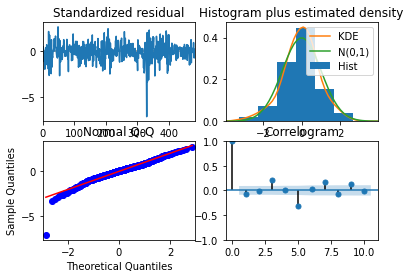

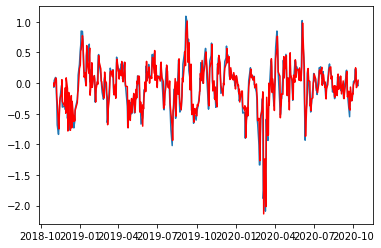

[-7.38705356e-02 -6.62195859e-02 -3.99107210e-02 -3.56538241e-02
 -2.15621552e-02 -1.91971302e-02 -1.16487510e-02 -1.03365805e-02
 -6.29290934e-03 -5.56580147e-03 -3.39945126e-03 -2.99701298e-03
 -1.83633410e-03 -1.61383632e-03 -9.91928596e-04 -8.69040769e-04
 -5.35790794e-04 -4.67983436e-04 -2.89398644e-04 -2.52017290e-04
 -1.56309157e-04 -1.35718665e-04 -8.44227130e-05 -7.30900180e-05
 -4.55954398e-05 -3.93627720e-05 -2.46247025e-05 -2.11993362e-05
 -1.32986729e-05 -1.14174127e-05 -7.18180478e-06 -6.14924586e-06
 -3.87835094e-06 -3.31195636e-06 -2.09434906e-06 -1.78383967e-06
 -1.13094039e-06 -9.60805256e-07 -6.10687835e-07 -5.17515231e-07
 -3.29752391e-07 -2.78752644e-07 -1.78051642e-07 -1.50149132e-07
 -9.61376643e-08 -8.08787642e-08 -5.19075954e-08 -4.35666256e-08
 -2.80258128e-08 -2.34682636e-08 -1.51312804e-08 -1.26419915e-08
 -8.16927460e-09 -6.81016167e-09 -4.41043929e-09 -3.66865293e-09
 -2.38106322e-09 -1.97634609e-09 -1.28543733e-09 -1.06469798e-09]
Now processing data is L

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


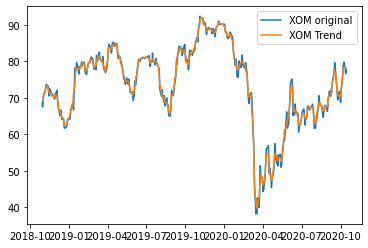

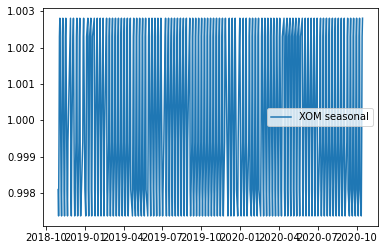

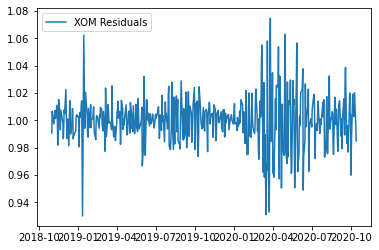

-1.8731766725362675
0.34478292753349127
{'1%': -3.4444305322234365, '5%': -2.8677488864580885, '10%': -2.5700770984781443}
-5.419468583057676
3.0824568814085853e-06
{'1%': -3.4444305322234365, '5%': -2.8677488864580885, '10%': -2.5700770984781443}


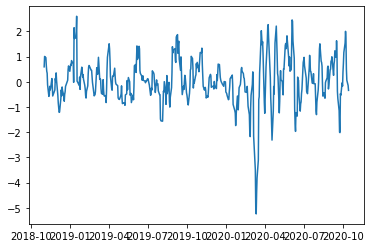

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

The sorted results from AIC
    p  d  q          AIC          BIC
24  2  0  2   637.231770   658.152515
21  2  0  1   637.497588   654.234183
18  2  0  0   649.933538   662.485984
15  1  0  2   656.843844   673.580440
12  1  0  1   660.935508   673.487955
9   1  0  0   692.736230   701.104528
6   0  0  2   692.808037   705.360484
10  1  1  0   707.168623   715.532793
4   0  1  1   707.851178   716.215348
13  1  1  1   709.167814   721.714068
19  2  1  0   709.167917   721.714172
7   0  1  2   709.301805   721.848060
16  1  1  2   711.158712   727.887052
22  2  1  1   711.164928   727.893268
25  2  1  2   713.147534   734.057959
14  1  2  1   714.438794   726.978844
26  2  2  2   714.922886   735.822969
8   0  2  2   715.216016   727.756066
23  2  2  1   716.438531   733.158598
1   0  1  0   725.409991   729.592076
5   0  2  1   733.089511   741.449544
20  2  2  0   827.258594   839.798644
11  1  2  0   868.940860   877.300893
2   0  2  0   949.963105   954.143121
3   0  0  1   950.8178

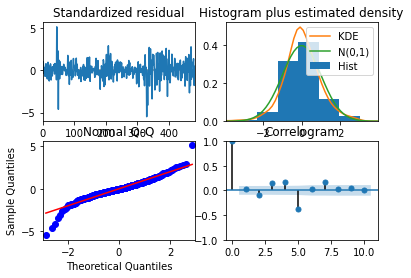

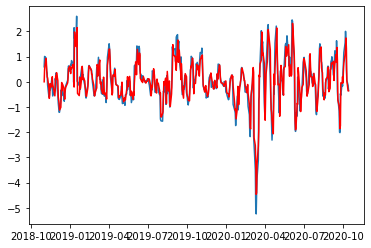

[-3.91400356e-01 -3.58365287e-01 -2.79138115e-01 -1.82703401e-01
 -9.06491792e-02 -1.62815553e-02  3.46145719e-02  6.20689838e-02
  6.98808728e-02  6.36834931e-02  4.93922238e-02  3.21517407e-02
  1.57769147e-02  2.60433317e-03 -6.36570965e-03 -1.11615779e-02
 -1.24747476e-02 -1.13156125e-02 -8.73864978e-03 -5.65692097e-03
 -2.74447046e-03 -4.11514130e-04  1.16912424e-03  2.00657514e-03
  2.22660038e-03  2.01038674e-03  1.54588098e-03  9.95112161e-04
  4.77160178e-04  6.40262884e-05 -2.14456075e-04 -3.60634422e-04
 -3.97365855e-04 -3.57134327e-04 -2.73434538e-04 -1.75016396e-04
 -8.29142544e-05 -9.76274579e-06  3.92928948e-05  6.47983203e-05
  7.09050620e-05  6.34357536e-05  4.83588431e-05  3.07750406e-05
  1.43993579e-05  1.44834452e-06 -7.19148451e-06 -1.16398643e-05
 -1.26503635e-05 -1.12664528e-05 -8.55151866e-06 -5.41040884e-06
 -2.49916397e-06 -2.06544670e-07  1.31486127e-06  2.09036599e-06
  2.25667211e-06  2.00074135e-06  1.51201114e-06  9.50979964e-07]
Now processing data is M

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


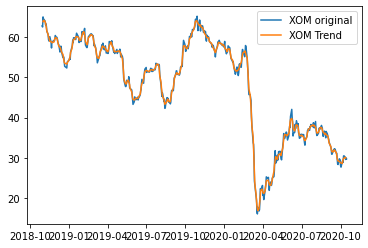

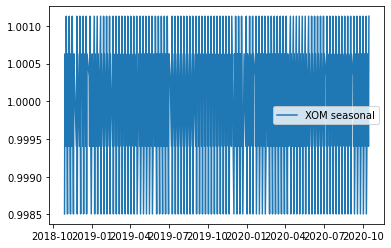

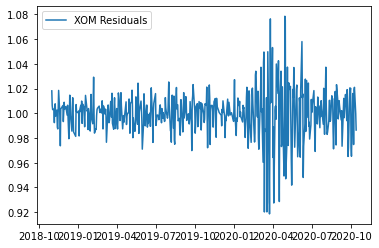

-1.4312062901313694
0.5672274055157164
{'1%': -3.4444305322234365, '5%': -2.8677488864580885, '10%': -2.5700770984781443}
-4.972669802482609
2.5129731899406423e-05
{'1%': -3.4444305322234365, '5%': -2.8677488864580885, '10%': -2.5700770984781443}


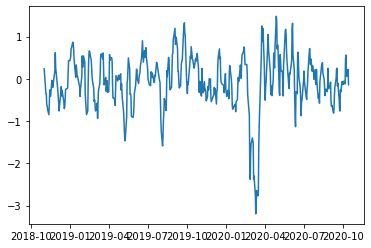

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

The sorted results from AIC
    p  d  q         AIC         BIC
21  2  0  1  153.135291  169.871887
18  2  0  0  154.390658  166.943104
24  2  0  2  154.598819  175.519564
12  1  0  1  158.863503  171.415950
15  1  0  2  159.061252  175.797848
4   0  1  1  194.520674  202.884844
9   1  0  0  194.611394  202.979691
10  1  1  0  196.137769  204.501939
7   0  1  2  196.508526  209.054781
13  1  1  1  196.508662  209.054917
19  2  1  0  197.040311  209.586565
22  2  1  1  198.506990  215.235330
16  1  1  2  198.513492  215.241831
25  2  1  2  200.496730  221.407155
8   0  2  2  202.882049  215.422099
26  2  2  2  203.979635  224.879718
14  1  2  1  204.418364  216.958414
23  2  2  1  205.414520  222.134586
1   0  1  0  218.187528  222.369613
5   0  2  1  226.918713  235.278746
17  1  2  2  229.120191  245.840258
6   0  0  2  253.942063  266.494510
20  2  2  0  309.947921  322.487971
11  1  2  0  367.276064  375.636097
2   0  2  0  432.482063  436.662079
3   0  0  1  542.880896  551.249194


C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


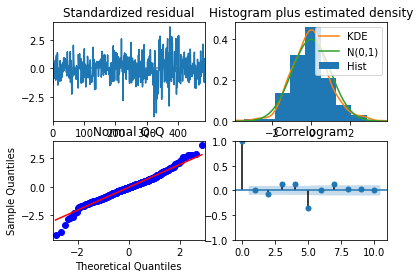

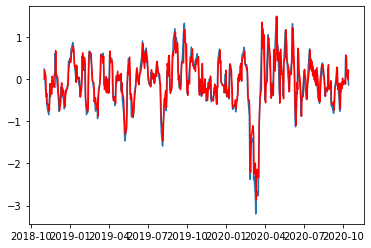

[-2.10528648e-01 -2.25454548e-01 -2.09454813e-01 -1.78333079e-01
 -1.42309991e-01 -1.07473512e-01 -7.70105836e-02 -5.21879985e-02
 -3.30917827e-02 -1.91560205e-02 -9.52047397e-03 -3.25674274e-03
  5.01334788e-04  2.49335861e-03  3.31089630e-03  3.40163566e-03
  3.08704082e-03  2.58546956e-03  2.03578974e-03  1.51874036e-03
  1.07477923e-03  7.18108407e-04  4.47118231e-04  2.51764349e-04
  1.18485861e-04  3.32587360e-05 -1.66925303e-05 -4.20967938e-05
 -5.14208123e-05 -5.09940196e-05 -4.53051476e-05 -3.73606509e-05
 -2.90384204e-05 -2.14010847e-05 -1.49537877e-05 -9.84416024e-06
 -6.00942807e-06 -3.27900200e-06 -1.44185879e-06 -2.87545591e-07
  3.71560672e-07  6.90579590e-07  7.90339443e-07  7.60073337e-07
  6.62267603e-07  5.38162992e-07  4.13022535e-07  3.00708725e-07
  2.07394962e-07  1.34408591e-07  8.02970304e-08  4.22499079e-08
  1.70184725e-08  1.46297508e-09 -7.16103415e-09 -1.10891619e-08
 -1.20408134e-08 -1.12704221e-08 -9.64509047e-09 -7.72829791e-09]
Now processing data is V

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


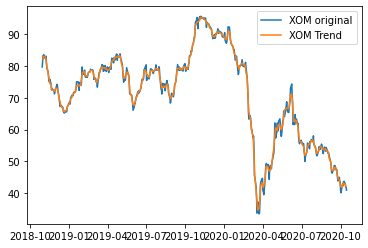

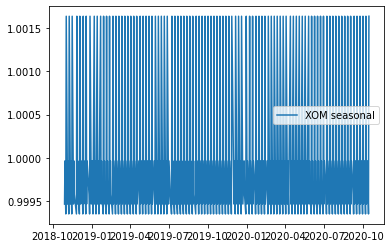

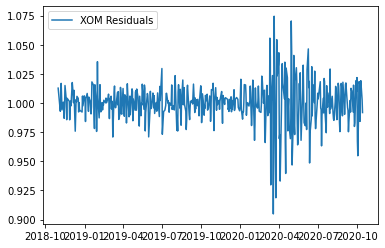

-1.8961980827637346
0.33385176100916814
{'1%': -3.444370153876086, '5%': -2.867722323562515, '10%': -2.5700629410213627}
-4.25227250892277
0.0005367840800351749
{'1%': -3.4444609168389615, '5%': -2.8677622536920317, '10%': -2.5700842229549266}


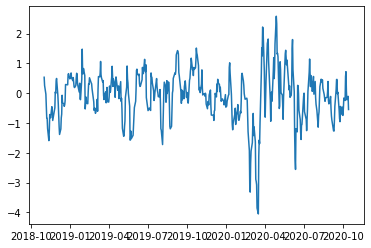

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

The sorted results from AIC
    p  d  q          AIC          BIC
18  2  0  0   538.444169   550.996615
21  2  0  1   539.420581   556.157176
24  2  0  2   540.297812   561.218556
12  1  0  1   542.323698   554.876145
15  1  0  2   542.470272   559.206868
25  2  1  2   543.541161   564.451585
16  1  1  2   546.290595   563.018935
9   1  0  0   580.976358   589.344656
6   0  0  2   585.071190   597.623637
4   0  1  1   589.821874   598.186044
19  2  1  0   591.034122   603.580376
7   0  1  2   591.292372   603.838627
13  1  1  1   591.443947   603.990202
22  2  1  1   592.770446   609.498786
10  1  1  0   593.238497   601.602667
8   0  2  2   597.356497   609.896547
23  2  2  1   598.707408   615.427475
17  1  2  2   599.020496   615.740562
14  1  2  1   600.728751   613.268801
26  2  2  2   603.726105   624.626188
1   0  1  0   612.250844   616.432929
5   0  2  1   620.159446   628.519480
20  2  2  0   721.343241   733.883291
11  1  2  0   777.177356   785.537389
2   0  2  0   834.5016

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


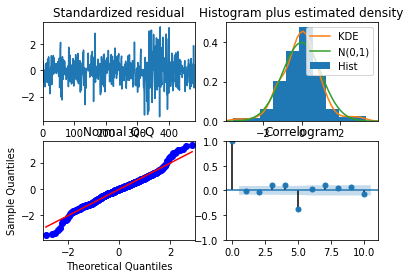

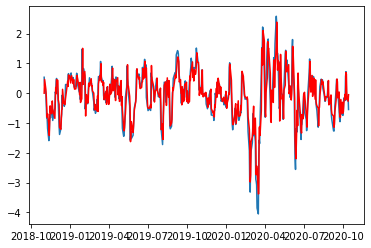

[-5.78510864e-01 -4.82322270e-01 -3.65902076e-01 -2.64718482e-01
 -1.86494722e-01 -1.29331236e-01 -8.88257254e-02 -6.06375506e-02
 -4.12357522e-02 -2.79728905e-02 -1.89458188e-02 -1.28187559e-02
 -8.66745439e-03 -5.85802924e-03 -3.95813989e-03 -2.67394633e-03
 -1.80619067e-03 -1.21994891e-03 -8.23945280e-04 -5.56469357e-04
 -3.75815903e-04 -2.53806781e-04 -1.71406585e-04 -1.15757550e-04
 -7.81752995e-05 -5.27945079e-05 -3.56539184e-05 -2.40782739e-05
 -1.62608465e-05 -1.09814773e-05 -7.41614587e-06 -5.00836166e-06
 -3.38230721e-06 -2.28418033e-06 -1.54258002e-06 -1.04175359e-06
 -7.03529473e-07 -4.75115920e-07 -3.20860950e-07 -2.16687643e-07
 -1.46336083e-07 -9.88254277e-08 -6.67399658e-08 -4.50716291e-08
 -3.04383098e-08 -2.05559621e-08 -1.38820973e-08 -9.37502340e-09
 -6.33125253e-09 -4.27569691e-09 -2.88751459e-09 -1.95003077e-09
 -1.31691802e-09 -8.89356770e-10 -6.00611013e-10 -4.05611787e-10
 -2.73922586e-10 -1.84988665e-10 -1.24928750e-10 -8.43683723e-11]
Now processing data is C

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


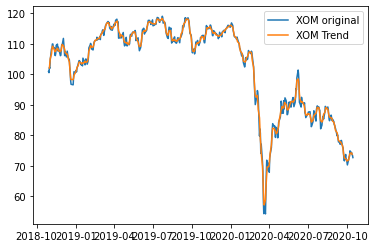

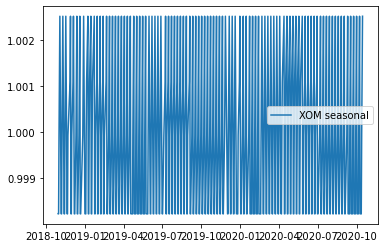

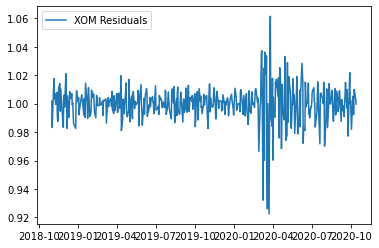

-0.8007237926721466
0.8189093665518028
{'1%': -3.4444305322234365, '5%': -2.8677488864580885, '10%': -2.5700770984781443}
-5.0879000625769075
1.4826014614287136e-05
{'1%': -3.4444305322234365, '5%': -2.8677488864580885, '10%': -2.5700770984781443}


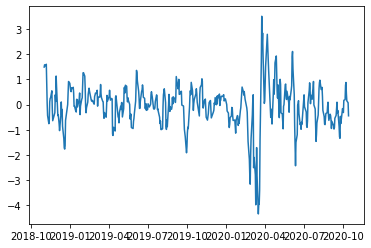

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

The sorted results from AIC
    p  d  q          AIC          BIC
21  2  0  1   616.549699   633.286295
18  2  0  0   616.845106   629.397552
24  2  0  2   617.846542   638.767287
25  2  1  2   621.102603   642.013028
12  1  0  1   622.867932   635.420378
15  1  0  2   622.933006   639.669602
16  1  1  2   627.142110   643.870450
9   1  0  0   670.389211   678.757509
6   0  0  2   674.514020   687.066467
4   0  1  1   676.422752   684.786922
7   0  1  2   677.671020   690.217274
13  1  1  1   677.798344   690.344599
19  2  1  0   678.261671   690.807926
22  2  1  1   679.517566   696.245905
10  1  1  0   680.816919   689.181089
8   0  2  2   683.724714   696.264764
17  1  2  2   685.155163   701.875230
23  2  2  1   685.696254   702.416321
14  1  2  1   688.062729   700.602779
26  2  2  2   691.529672   712.429755
1   0  1  0   704.243232   708.425317
5   0  2  1   711.942607   720.302640
20  2  2  0   807.876633   820.416683
11  1  2  0   861.524224   869.884257
3   0  0  1   881.2695

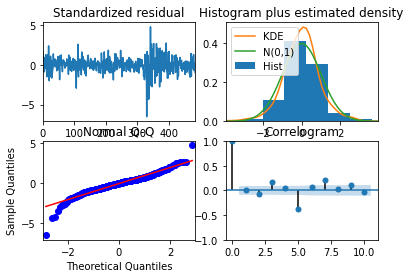

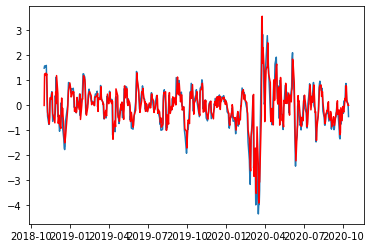

[-5.22555668e-01 -4.72407392e-01 -3.65500205e-01 -2.48241670e-01
 -1.45955295e-01 -6.89032730e-02 -1.79387494e-02  1.10046127e-02
  2.37870719e-02  2.61681163e-02  2.28628391e-02  1.72434406e-02
  1.14194238e-02  6.49603498e-03  2.87854176e-03  5.47284120e-04
 -7.29534358e-04 -1.25133175e-03 -1.30018668e-03 -1.10073562e-03
 -8.09739081e-04 -5.22495260e-04 -2.86693029e-04 -1.17648949e-04
 -1.16185762e-05  4.41646725e-05  6.48417535e-05  6.41467113e-05
  5.27314141e-05  3.78473991e-05  2.37709238e-05  1.25316736e-05
  4.66981348e-06 -1.23146467e-07 -2.53293853e-06 -3.31837397e-06
 -3.14446548e-06 -2.51396192e-06 -1.76060635e-06 -1.07486318e-06
 -5.41677122e-07 -1.77822790e-07  3.73945991e-08  1.40105598e-07
  1.68038824e-07  1.53226755e-07  1.19288404e-07  8.15020615e-08
  4.82806320e-08  2.31039453e-08  6.34960110e-09 -3.24339899e-09
 -7.54969221e-09 -8.43185792e-09 -7.42513847e-09 -5.63397966e-09
 -3.75385047e-09 -2.15284254e-09 -9.69517700e-10 -2.02121917e-10]
Now processing data is R

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


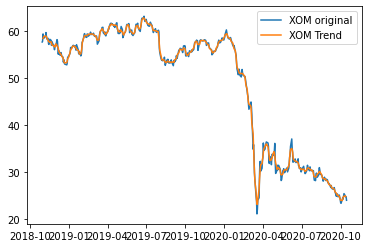

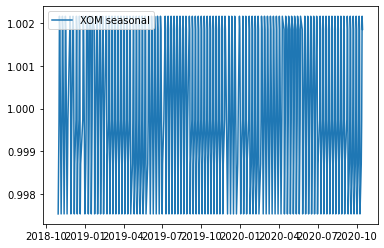

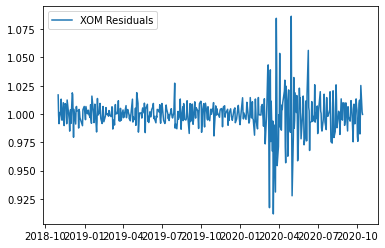

-0.11872661903556982
0.9475410496378511
{'1%': -3.444370153876086, '5%': -2.867722323562515, '10%': -2.5700629410213627}
-4.647555367470918
0.00010546410737428639
{'1%': -3.444370153876086, '5%': -2.867722323562515, '10%': -2.5700629410213627}


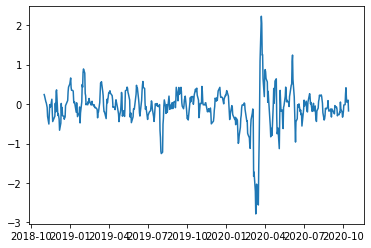

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

The sorted results from AIC
    p  d  q         AIC         BIC
21  2  0  1  -45.911012  -29.174416
24  2  0  2  -44.331837  -23.411092
18  2  0  0  -40.309307  -27.756860
12  1  0  1  -35.766305  -23.213858
15  1  0  2  -35.019859  -18.283263
9   1  0  0   -0.957576    7.410722
4   0  1  1    8.842852   17.207021
13  1  1  1   10.523999   23.070254
7   0  1  2   10.534308   23.080563
10  1  1  0   10.836621   19.200791
19  2  1  0   11.615419   24.161673
22  2  1  1   12.510137   29.238477
16  1  1  2   12.520128   29.248468
25  2  1  2   14.501123   35.411547
8   0  2  2   17.603895   30.143945
14  1  2  1   19.543523   32.083573
23  2  2  1   20.420600   37.140666
26  2  2  2   23.373830   44.273913
1   0  1  0   29.106020   33.288105
6   0  0  2   32.797433   45.349879
5   0  2  1   38.225355   46.585388
17  1  2  2   39.087764   55.807831
20  2  2  0  119.037573  131.577623
11  1  2  0  186.685108  195.045141
2   0  2  0  254.805640  258.985656
3   0  0  1  279.432111  287.800409


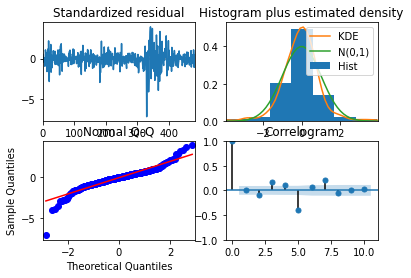

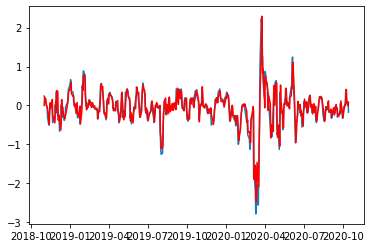

[-2.15101334e-01 -2.16839243e-01 -1.92835629e-01 -1.55501266e-01
 -1.14144991e-01 -7.50573875e-02 -4.19123999e-02 -1.63214351e-02
  1.58123567e-03  1.26012262e-02  1.80390820e-02  1.93545723e-02
  1.79381890e-02  1.49761744e-02  1.13896936e-02  7.82744323e-03
  4.69255471e-03  2.18784431e-03  3.67308542e-04 -8.14431148e-04
 -1.45968841e-03 -1.69456615e-03 -1.64546213e-03 -1.42433272e-03
 -1.12114250e-03 -8.01684152e-04 -5.09011216e-04 -2.66965897e-04
 -8.46096582e-05  3.92939137e-05  1.12282271e-04  1.44963687e-04
  1.48640546e-04  1.33741753e-04  1.08942854e-04  8.08183205e-05
  5.38670811e-05  3.07686667e-05  1.27540257e-05  5.18956964e-09
 -7.97325433e-06 -1.20433176e-05 -1.31966725e-05 -1.23913796e-05
 -1.04536059e-05 -8.03138514e-06 -5.58629459e-06 -3.40982185e-06
 -1.65328863e-06 -3.62795057e-07  4.86737683e-07  9.62028128e-07
  1.14813150e-06  1.13173559e-06  9.90518849e-07  7.87533569e-07
  5.69383431e-07  3.66986410e-07  1.97867214e-07  6.91416041e-08]
Now processing data is B

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


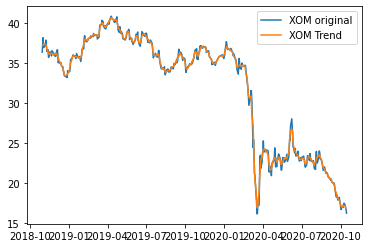

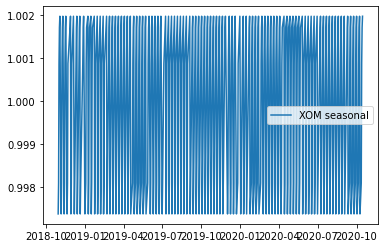

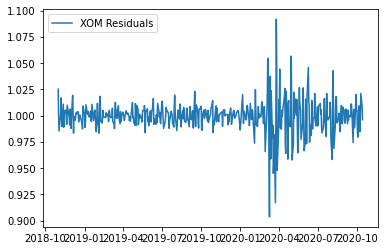

-0.08944807631141362
0.9504794562532777
{'1%': -3.444370153876086, '5%': -2.867722323562515, '10%': -2.5700629410213627}
-4.471206025775699
0.0002215884418052817
{'1%': -3.444370153876086, '5%': -2.867722323562515, '10%': -2.5700629410213627}


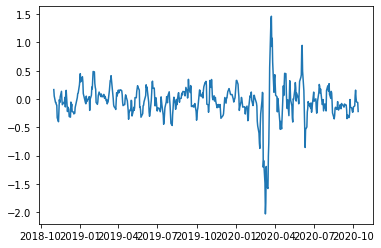

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

The sorted results from AIC
    p  d  q         AIC         BIC
25  2  1  2 -431.423846 -410.513421
21  2  0  1 -418.057305 -401.320709
24  2  0  2 -417.021220 -396.100475
18  2  0  0 -410.960627 -398.408181
12  1  0  1 -409.125662 -396.573216
15  1  0  2 -407.301792 -390.565196
9   1  0  0 -378.192359 -369.824061
4   0  1  1 -359.965952 -351.601783
7   0  1  2 -359.738917 -347.192663
13  1  1  1 -359.733988 -347.187734
22  2  1  1 -358.033169 -341.304830
16  1  1  2 -357.862528 -341.134188
19  2  1  0 -357.526620 -344.980365
10  1  1  0 -357.450514 -349.086344
8   0  2  2 -350.419706 -337.879656
17  1  2  2 -350.111710 -333.391643
14  1  2  1 -347.917820 -335.377770
23  2  2  1 -347.864822 -331.144755
1   0  1  0 -344.519870 -340.337785
5   0  2  1 -334.633612 -326.273579
6   0  0  2 -333.612776 -321.060329
26  2  2  2 -288.502253 -267.602170
20  2  2  0 -256.502030 -243.961980
11  1  2  0 -171.987984 -163.627951
3   0  0  1 -126.980921 -118.612623
2   0  2  0 -101.287239  -97.107222


C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                  trend   No. Observations:                  485
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 220.712
Date:                Wed, 21 Oct 2020   AIC                           -431.424
Time:                        15:25:04   BIC                           -410.513
Sample:                             0   HQIC                          -423.207
                                - 485                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6483      0.030     21.613      0.000       0.590       0.707
ar.L2         -0.6155      0.030    -20.399      0.000      -0.675      -0.556
ma.L1         -0.6626      0.015    -43.247      0.0

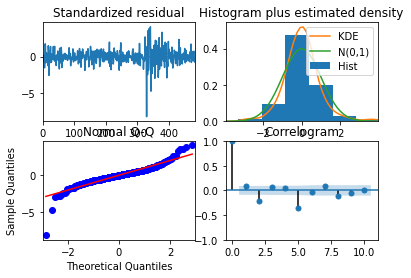

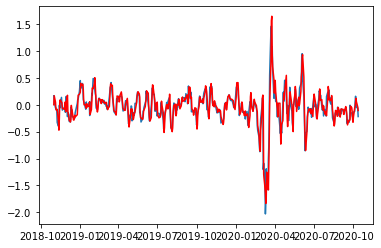

[-0.26182057 -0.29959979 -0.29807936 -0.27384232 -0.2590644  -0.26440011
 -0.27695453 -0.2818101  -0.27723149 -0.27127465 -0.27023055 -0.27321977
 -0.27580038 -0.27563375 -0.27393748 -0.27294028 -0.27333774 -0.27420915
 -0.2745295  -0.27420088 -0.27379067 -0.27372696 -0.27393813 -0.27411424
 -0.27409846 -0.27397984 -0.27391264 -0.27394208 -0.27400253 -0.27402359
 -0.27400005 -0.27397182 -0.27396801 -0.27398291 -0.27399492 -0.27399353
 -0.27398525 -0.27398072 -0.27398289 -0.27398708 -0.27398846 -0.27398678
 -0.27398484 -0.27398462 -0.27398567 -0.27398649 -0.27398637 -0.27398579
 -0.27398549 -0.27398565 -0.27398594 -0.27398603 -0.27398591 -0.27398577
 -0.27398576 -0.27398583 -0.27398589 -0.27398588 -0.27398584 -0.27398582]
Now processing data is XOM close price . please wait......


C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


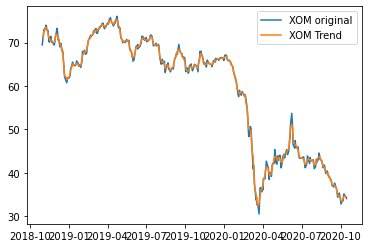

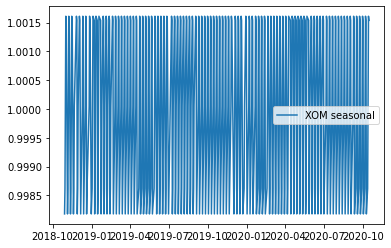

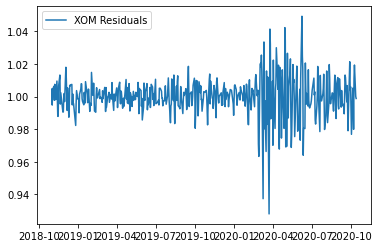

-0.45707534702238806
0.9001242910488759
{'1%': -3.4444305322234365, '5%': -2.8677488864580885, '10%': -2.5700770984781443}
-4.606271518554609
0.00012577489234949073
{'1%': -3.4444305322234365, '5%': -2.8677488864580885, '10%': -2.5700770984781443}


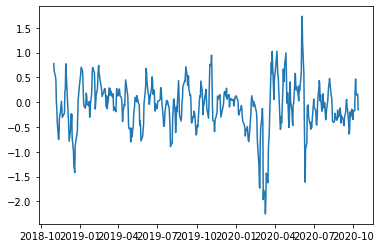

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

The sorted results from AIC
    p  d  q         AIC         BIC
21  2  0  1  -48.458891  -31.722296
24  2  0  2  -46.639606  -25.718861
18  2  0  0  -45.572227  -33.019780
15  1  0  2  -38.072862  -21.336267
12  1  0  1  -36.373991  -23.821545
9   1  0  0    4.704864   13.073162
4   0  1  1    6.857775   15.221945
10  1  1  0    7.614785   15.978954
13  1  1  1    8.767716   21.313971
7   0  1  2    8.779212   21.325467
19  2  1  0    8.908612   21.454867
22  2  1  1   10.731212   27.459552
16  1  1  2   10.755314   27.483654
25  2  1  2   12.724979   33.635404
8   0  2  2   15.574458   28.114508
14  1  2  1   16.225237   28.765287
17  1  2  2   17.453253   34.173319
23  2  2  1   17.592764   34.312831
26  2  2  2   20.020319   40.920402
1   0  1  0   33.229803   37.411887
6   0  0  2   39.320530   51.872976
5   0  2  1   42.317703   50.677736
20  2  2  0  132.650637  145.190687
11  1  2  0  174.067143  182.427177
2   0  2  0  238.121005  242.301022
3   0  0  1  283.474790  291.843088


C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


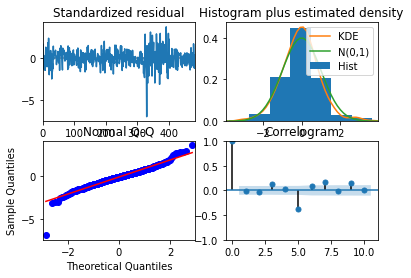

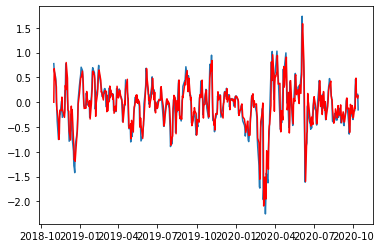

[-2.23573775e-01 -2.31160622e-01 -2.03546675e-01 -1.60621976e-01
 -1.15281263e-01 -7.48533400e-02 -4.26407205e-02 -1.93077752e-02
 -3.99612558e-03  4.86107999e-03  9.00005872e-03  1.00106057e-02
  9.18483462e-03  7.47596105e-03  5.52245627e-03  3.70435836e-03
  2.20930305e-03  1.09476516e-03  3.39699970e-04 -1.16656099e-04
 -3.48278679e-04 -4.26158298e-04 -4.09920957e-04 -3.44841134e-04
 -2.62190921e-04 -1.81351557e-04 -1.12591447e-04 -5.98245173e-05
 -2.29792661e-05  1.68636859e-07  1.27063965e-05  1.77656727e-05
  1.80723728e-05  1.57580495e-05  1.23391434e-05  8.79015462e-06
  5.65773920e-06  3.18135083e-06  1.40087473e-06  2.42427939e-07
 -4.19465611e-07 -7.21054511e-07 -7.85730420e-07 -7.12970678e-07
 -5.75620819e-07 -4.22075654e-07 -2.80819082e-07 -1.65620699e-07
 -8.03754509e-08 -2.30852868e-08  1.11713351e-08  2.82267830e-08
  3.36070786e-08  3.19134649e-08  2.66137646e-08  2.00847453e-08
  1.37848744e-08  8.47411571e-09  4.42908066e-09  1.62612607e-09]
Now processing data is c

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


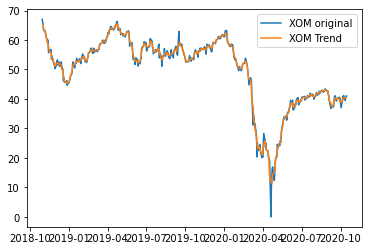

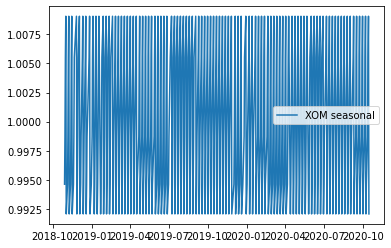

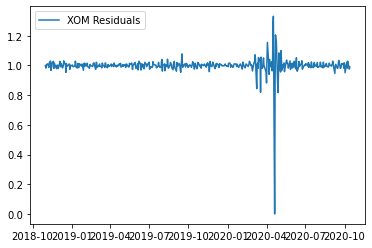

-1.5994106279850855
0.4838895257706125
{'1%': -3.444370153876086, '5%': -2.867722323562515, '10%': -2.5700629410213627}
-4.6453933527811655
0.00010644503356476393
{'1%': -3.444370153876086, '5%': -2.867722323562515, '10%': -2.5700629410213627}


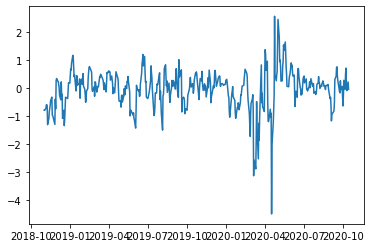

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

The sorted results from AIC
    p  d  q          AIC          BIC
24  2  0  2   570.310122   591.230866
21  2  0  1   572.021104   588.757699
25  2  1  2   576.616845   597.527270
9   1  0  0   576.849407   585.217704
18  2  0  0   578.770535   591.322982
12  1  0  1   578.780637   591.333084
15  1  0  2   579.527933   596.264529
13  1  1  1   581.494798   594.041052
22  2  1  1   583.398097   600.126437
16  1  1  2   583.410149   600.138488
7   0  1  2   625.316557   637.862812
4   0  1  1   625.353227   633.717397
10  1  1  0   626.228945   634.593115
19  2  1  0   627.014082   639.560336
17  1  2  2   629.919600   646.639666
26  2  2  2   631.322417   652.222500
1   0  1  0   631.956862   636.138947
8   0  2  2   633.544114   646.084164
14  1  2  1   634.352039   646.892089
23  2  2  1   635.235229   651.955295
5   0  2  1   639.831676   648.191709
6   0  0  2   645.400863   657.953310
3   0  0  1   761.896379   770.264676
20  2  2  0   799.975036   812.515086
11  1  2  0   858.7489

C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible st

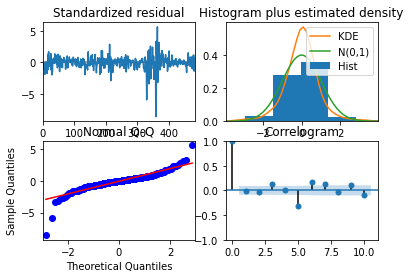

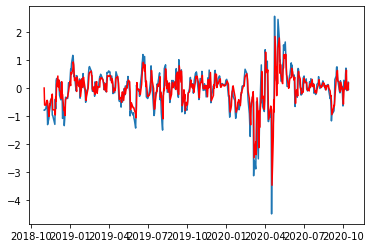

[-2.58820173e-02 -5.72851849e-02 -8.16235980e-03 -3.59095220e-02
  1.09824191e-04 -2.32962169e-02  3.57533060e-03 -1.56404368e-02
  4.67042056e-03 -1.08420089e-02  4.65859159e-03 -7.72946843e-03
  4.18274590e-03 -5.64007205e-03  3.55998157e-03 -4.19186833e-03
  2.93841760e-03 -3.15952241e-03  2.38018364e-03 -2.40629782e-03
  1.90499017e-03 -1.84651477e-03  1.51272759e-03 -1.42461165e-03
  1.19496747e-03 -1.10330076e-03  9.40637108e-04 -8.56743434e-04
  7.38671625e-04 -6.66524461e-04  5.79127856e-04 -5.19209863e-04
  4.53539080e-04 -4.04817025e-04  3.54914876e-04 -3.15822871e-04
  2.77591848e-04 -2.46498414e-04  2.17036754e-04 -1.92447749e-04
  1.69649531e-04 -1.50279559e-04  1.32586196e-04 -1.17367511e-04
  1.03607984e-04 -9.16722406e-05  8.09567782e-05 -7.16072029e-05
  6.32541722e-05 -5.59365257e-05  4.94206655e-05 -4.36966340e-05
  3.86114944e-05 -3.41357874e-05  3.01659349e-05 -2.66672586e-05
  2.35673942e-05 -2.08329754e-05  1.84120703e-05 -1.62752367e-05]


C:\Users\mohua\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [10]:
x=df.index
range_data=len(df.columns)
column_name=df.columns.tolist()

rows, cols = (time_period, range_data) 
forecast_closing_price = [[0]*cols]*rows

for i in range(range_data):
    print('Now processing data is',column_name[i],'. please wait......')
    y=df[column_name[i]]
    p,d,q,y1_stationary,y1,stock_value_trend=optimization_parameter(read_list[0],x,y)
    model1 = SARIMAX(y1_stationary, order=(p,d,q),)
    results1 = model1.fit()
    # Print summary
    print(results1.summary())
    
    results1.plot_diagnostics()
    plt.show()
    
    plt.plot(figsize=(15,10))
    plt.plot(y1_stationary)
    plt.plot(results1.predict(), color = 'red')
    plt.show()
    
    forecast=results1.forecast(time_period)
    forecast1=forecast.to_numpy()
    forecast_closing_price[i]=forecast1
    print( forecast_closing_price[i])


In [36]:
forecast_data=pd.DataFrame(forecast_closing_price)
forecast_data1=forecast_data.dropna()
forecast_data2=forecast_data1.T
forecast_data3=forecast_data2.to_numpy()
print(forecast_data3.shape)

(60, 11)


In [37]:
print(forecast_data3)
print(forecast_data3[0][2])

[[-3.80216662e-01 -5.06936601e-03 -7.38705356e-02 -3.91400356e-01
  -2.10528648e-01 -5.78510864e-01 -5.22555668e-01 -2.15101334e-01
  -2.61820569e-01 -2.23573775e-01 -2.58820173e-02]
 [-3.62633077e-01 -2.63462436e-02 -6.62195859e-02 -3.58365287e-01
  -2.25454548e-01 -4.82322270e-01 -4.72407392e-01 -2.16839243e-01
  -2.99599794e-01 -2.31160622e-01 -5.72851849e-02]
 [-3.13406520e-01 -3.34596660e-02 -3.99107210e-02 -2.79138115e-01
  -2.09454813e-01 -3.65902076e-01 -3.65500205e-01 -1.92835629e-01
  -2.98079360e-01 -2.03546675e-01 -8.16235980e-03]
 [-2.46543606e-01 -3.26678579e-02 -3.56538241e-02 -1.82703401e-01
  -1.78333079e-01 -2.64718482e-01 -2.48241670e-01 -1.55501266e-01
  -2.73842319e-01 -1.60621976e-01 -3.59095220e-02]
 [-1.73836833e-01 -2.80761793e-02 -2.15621552e-02 -9.06491792e-02
  -1.42309991e-01 -1.86494722e-01 -1.45955295e-01 -1.14144991e-01
  -2.59064395e-01 -1.15281263e-01  1.09824191e-04]
 [-1.04304250e-01 -2.21995034e-02 -1.91971302e-02 -1.62815553e-02
  -1.07473512e-01 -

In [38]:
start_value=df.iloc[-1].to_numpy()
print(start_value)

[33.03461538 12.7821875  16.12449375 77.062      29.76545455 40.94136364
 72.66499286 24.01392143 16.2243625  34.03291875 40.959999  ]


In [39]:
for i in range(range_data):
    forecast_data3[0][i]=start_value[i]+forecast_data3[0][i]
    print(i)
    for j in range(time_period-1):
        forecast_data3[j+1][i]=forecast_data3[j+1][i]+forecast_data3[j][i]
        print(forecast_data3[j][i])

0
32.65439871831413
32.291765640887995
31.978359120778354
31.731815514536883
31.55797868109635
31.453674431152297
31.40960491847599
31.41303613321263
31.450065844586724
31.50736244036469
31.573349863940606
31.63887692429742
31.697450459375332
31.745133244671752
31.780212640240144
31.802738899314683
31.814017008643933
31.816116694263094
31.81144494536108
31.80240643157862
31.791161061987278
31.779475474159124
31.76865666225783
31.75955101397299
31.7525901878483
31.747865826072406
31.745217320737904
31.744320035647224
31.74476493477647
31.746124019556216
31.74799900926657
31.750053125079283
31.752027586236686
31.753745513385066
31.755106438088042
31.75607465431456
31.756664346845998
31.756923919838847
31.756921338118403
31.75673167413845
31.756427490128022
31.75607221867235
31.75571635525883
31.75539604525273
31.755133524852404
31.75493884237232
31.754812320469917
31.754747298950306
31.75473280079283
31.754755873784607
31.754803463603317
31.754863762698637
31.754927048197626
31.754986069

In [57]:
forecast_data4=pd.DataFrame(forecast_data3)
forecast_data4.columns=df.columns
forecast_data4.head()

,TOT close price,HAL close price,SLB close price,LYB close price,MPC close price,VLO close price,CVX close price,RDS-B close price,BP close price,XOM close price,crude oil close price
0,32.654399,12.777118,16.050623,76.670600,29.554926,40.362853,72.142437,23.798820,15.962542,33.809345,40.934117
1,32.291766,12.750772,15.984404,76.312234,29.329471,39.880531,71.670030,23.581981,15.662942,33.578184,40.876832
2,31.978359,12.717312,15.944493,76.033096,29.120017,39.514628,71.304530,23.389145,15.364863,33.374638,40.868669
3,31.731816,12.684644,15.908839,75.850393,28.941683,39.249910,71.056288,23.233644,15.091020,33.214016,40.832760
4,31.557979,12.656568,15.887277,75.759744,28.799373,39.063415,70.910333,23.119499,14.831956,33.098734,40.832870


In [58]:
# back to the normal datas
import datetime
forecast_start_day=x.max()
forecast_end_day=forecast_start_day+datetime.timedelta(time_period)

In [59]:
print(forecast_start_day)

2020-10-15 00:00:00


In [65]:
# create a time series based on the date
forecast_data4['time']= pd.date_range(forecast_start_day+datetime.timedelta(1), forecast_end_day, freq="D")
forecast_data5=forecast_data4.set_index('time')
forecast_data5.head()

,TOT close price,HAL close price,SLB close price,LYB close price,MPC close price,VLO close price,CVX close price,RDS-B close price,BP close price,XOM close price,crude oil close price
time,,,,,,,,,,,
2020-10-16,32.654399,12.777118,16.050623,76.670600,29.554926,40.362853,72.142437,23.798820,15.962542,33.809345,40.934117
2020-10-17,32.291766,12.750772,15.984404,76.312234,29.329471,39.880531,71.670030,23.581981,15.662942,33.578184,40.876832
2020-10-18,31.978359,12.717312,15.944493,76.033096,29.120017,39.514628,71.304530,23.389145,15.364863,33.374638,40.868669
2020-10-19,31.731816,12.684644,15.908839,75.850393,28.941683,39.249910,71.056288,23.233644,15.091020,33.214016,40.832760
2020-10-20,31.557979,12.656568,15.887277,75.759744,28.799373,39.063415,70.910333,23.119499,14.831956,33.098734,40.832870


now plot TOT close price


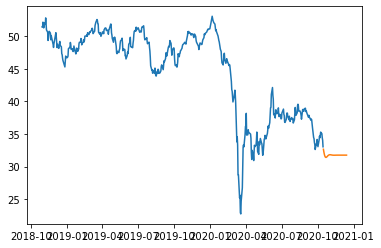

now plot HAL close price


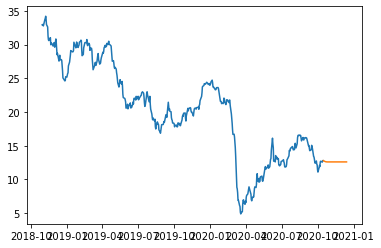

now plot SLB close price


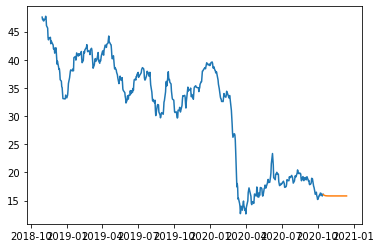

now plot LYB close price


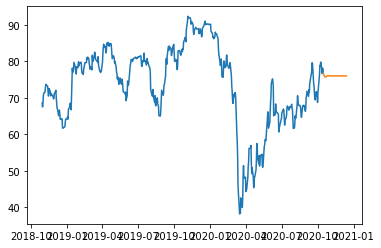

now plot MPC close price


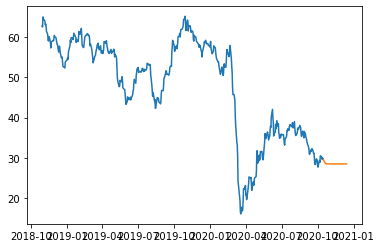

now plot VLO close price


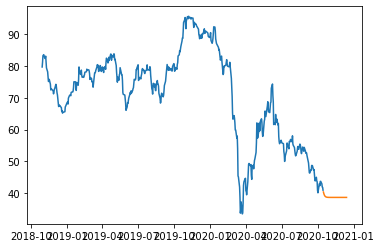

now plot CVX close price


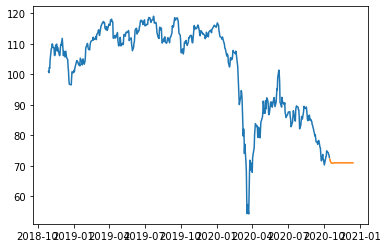

now plot RDS-B close price


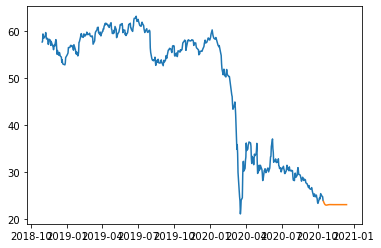

now plot BP close price


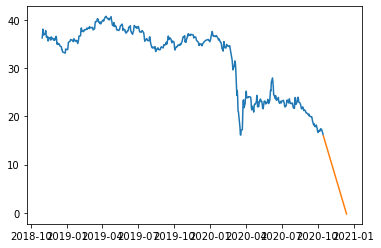

now plot XOM close price


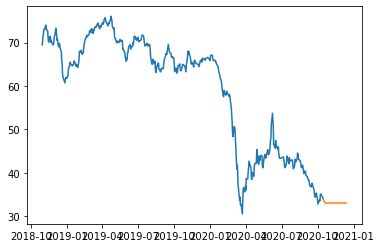

now plot crude oil close price


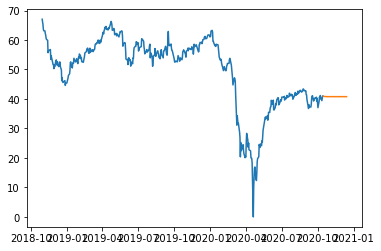

In [69]:
#print predicted data 
for i in range (range_data):
    print('now plot',column_name[i])
    plt.plot(df.index,df[column_name[i]])
    plt.plot(forecast_data5.index,forecast_data5[column_name[i]])
    plt.show()